In [8]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 100
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#from google.colab import files

# upload test.csv and train.csv
#uploaded = files.upload()

In [9]:
train_df = pd.read_csv('train.csv')
train_df = train_df.replace("\\?", np.nan, regex=True)
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [10]:
profile = pandas_profiling.ProfileReport(train_df)
profile

In [11]:
rejected_variables = profile.get_rejected_variables(threshold=0.90)
rejected_variables

[]

In [12]:
profile.to_file(outputfile="output.html")

In [13]:
train_df.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

In [14]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
train_dft = train_df.copy()

In [65]:
train_dft['MasVnrArea'] = train_dft['MasVnrArea'].astype(float)
train_dft['GarageYrBlt'] = train_dft['GarageYrBlt'].astype(float)

ValueError: could not convert string to float: 'NA'

train_dft['MasVnrArea'] = pd.to_numeric(train_dft['MasVnrArea'])
train_dft['GarageYrBlt'] = pd.to_numeric(train_dft['GarageYrBlt'])

In [17]:
train_dft = train_df.fillna('NA')

In [18]:
def hasporch(OpenPorchSF,EnclosedPorch,ScreenPorch,SsnPorch):
    if OpenPorchSF > 0 or EnclosedPorch > 0 or ScreenPorch >0 or SsnPorch >0:
        return 'Has Porch'
    else:
        return 'NA'
        
train_dft['Has_porch'] = train_dft.apply(lambda x: hasporch(x['OpenPorchSF'],x['EnclosedPorch'],x['ScreenPorch'],x['3SsnPorch']),axis=1)

In [19]:
def hasgarage(GarageArea):
    if GarageArea > 0:
        return 'Has Garage'
    else:
        return 'NA'
        
train_dft['Has_Garage'] = train_dft.apply(lambda x: hasgarage(x['GarageArea']),axis=1)

In [20]:
train_dft.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

### Try some graphing randomly

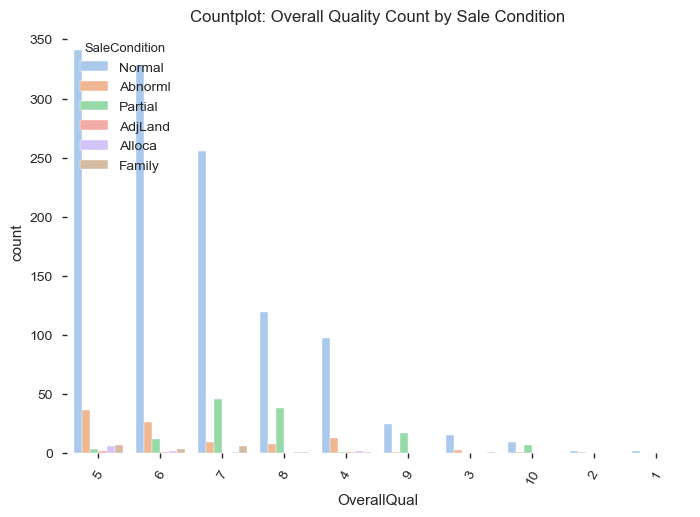

In [21]:
sns.set_style("ticks")
g = sns.countplot(x="OverallQual", hue='SaleCondition', dodge=True,
                  data=train_dft, order=train_dft['OverallQual'].value_counts().index, palette="pastel")
for item in g.get_xticklabels():
    item.set_rotation(60)
plt.title('Countplot: Overall Quality Count by Sale Condition')
plt.show()

C:\Users\TianiCalip\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


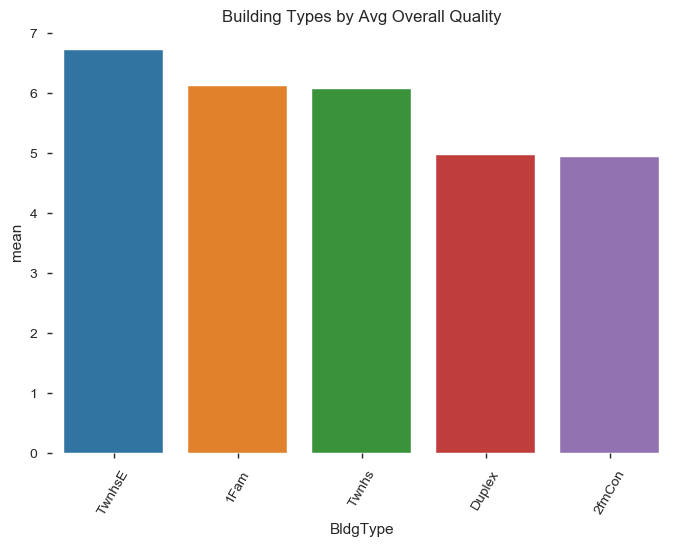

In [22]:
bldg_quality = train_dft.groupby('BldgType')['OverallQual'].agg({'mean': 'mean', 'count': 'count'}).reset_index(
).sort_values(by='mean', ascending=False).head(20)
plot = sns.barplot(x='BldgType', y='mean', data=bldg_quality)
plot.set_title('Building Types by Avg Overall Quality')
for item in plot.get_xticklabels():
    item.set_rotation(60)

In [23]:
bldg_quality

BldgType      mean  count
4   TwnhsE  6.710526    114
0     1Fam  6.121311   1220
3    Twnhs  6.069767     43
2   Duplex  4.961538     52
1   2fmCon  4.935484     31

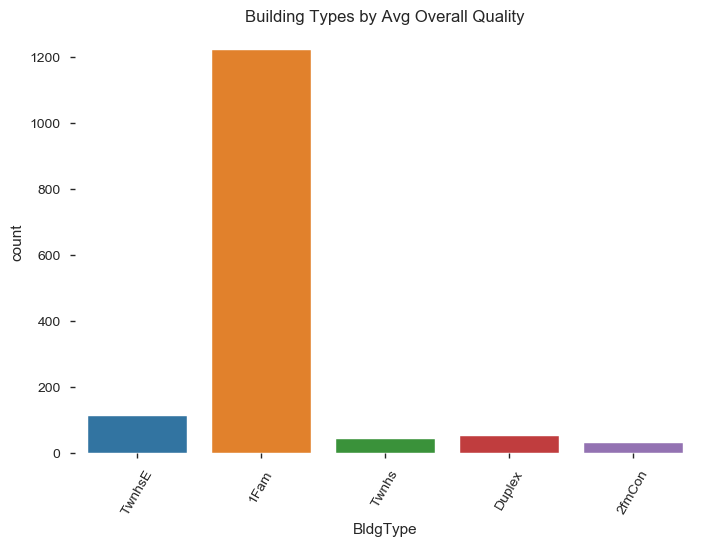

In [24]:
plot = sns.barplot(x='BldgType', y='count', data=bldg_quality)
plot.set_title('Building Types by Avg Overall Quality')
for item in plot.get_xticklabels():
    item.set_rotation(60)

C:\Users\TianiCalip\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


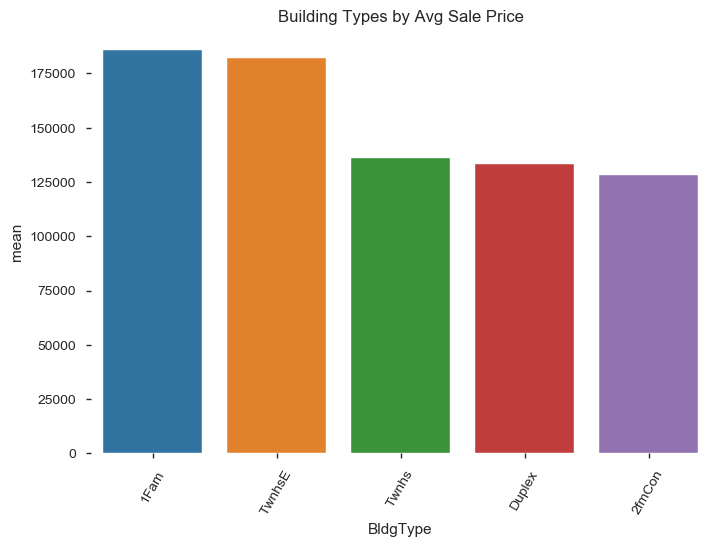

In [25]:
bldg_price = train_dft.groupby('BldgType')['SalePrice'].agg({'mean': 'mean', 'count': 'count'}).reset_index(
).sort_values(by='mean', ascending=False)
plot = sns.barplot(x='BldgType', y='mean', data=bldg_price)
plot.set_title('Building Types by Avg Sale Price')
for item in plot.get_xticklabels():
    item.set_rotation(60)

In [26]:
bldg_price

BldgType           mean  count
0     1Fam  185763.807377   1220
4   TwnhsE  181959.342105    114
3    Twnhs  135911.627907     43
2   Duplex  133541.076923     52
1   2fmCon  128432.258065     31

C:\Users\TianiCalip\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


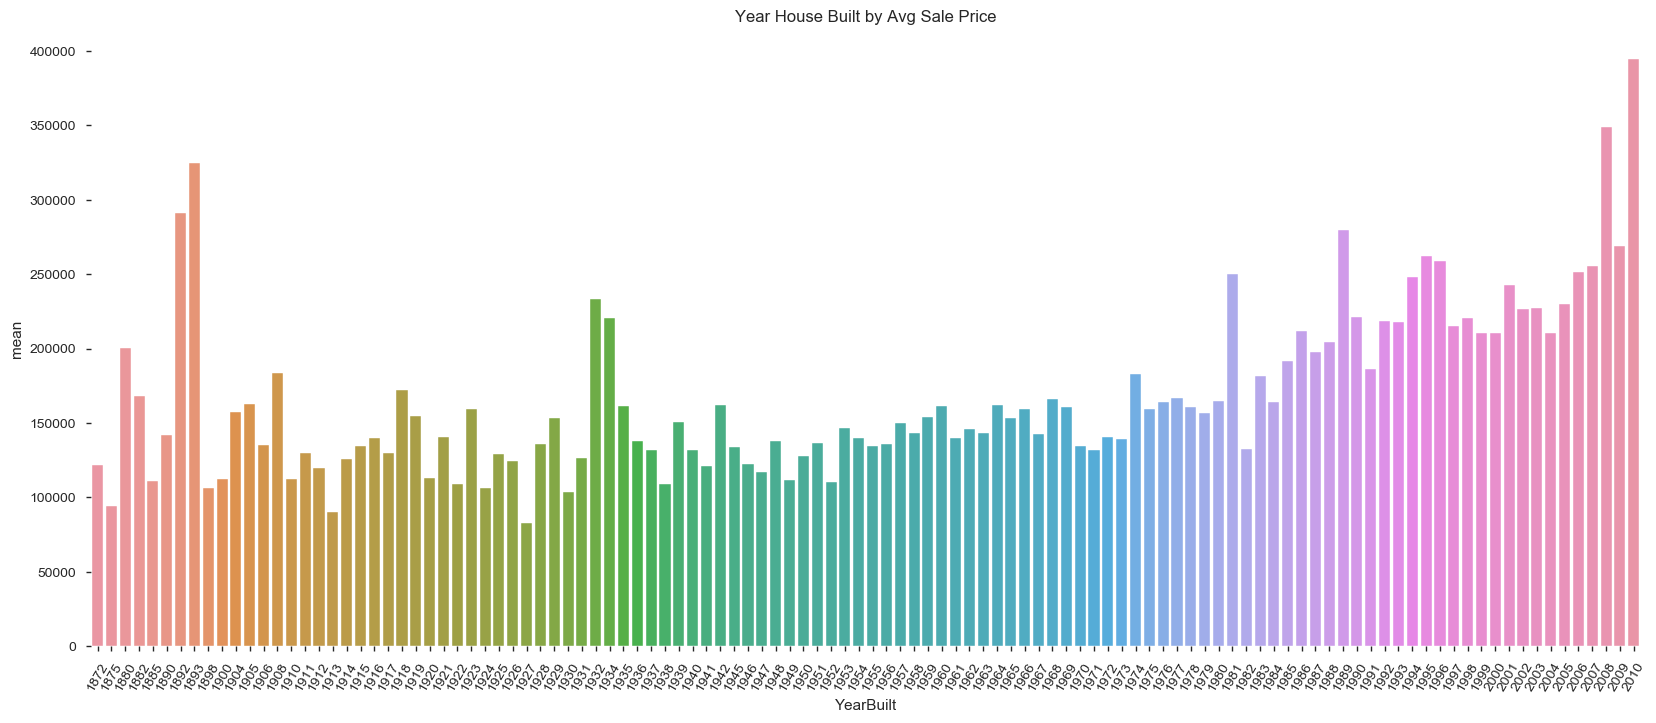

In [27]:
yrbuilt_price = train_dft.groupby('YearBuilt')['SalePrice'].agg({'mean': 'mean', 'count': 'count'}).reset_index(
).sort_values(by='mean', ascending=False)
f, ax = plt.subplots(figsize=(20, 8))
plot = sns.barplot(x='YearBuilt', y='mean', data=yrbuilt_price)
plot.set_title('Year House Built by Avg Sale Price')
for item in plot.get_xticklabels():
    item.set_rotation(60)

In [28]:
yrbuilt_price.head(20)

YearBuilt           mean  count
111       2010  394432.000000      1
109       2008  348849.130435     23
7         1893  325000.000000      1
6         1892  291250.000000      2
90        1989  279500.000000      3
110       2009  269220.000000     18
96        1995  262194.444444     18
97        1996  259162.666667     15
108       2007  255362.734694     49
107       2006  251775.447761     67
82        1981  249880.000000      5
95        1994  247900.000000     19
102       2001  242630.000000     20
36        1932  233358.500000      4
106       2005  229680.953125     64
104       2003  227408.577778     45
103       2002  226869.565217     23
91        1990  220881.666667     12
37        1934  220766.666667      3
99        1998  220450.000000     25

In [29]:
yrbuilt_price.tail(20)

YearBuilt           mean  count
30       1926  124144.444444      9
47       1946  122400.000000      7
0        1872  122000.000000      1
44       1941  120900.000000     15
16       1912  119466.666667      3
48       1947  117200.000000      5
24       1920  112903.333333     30
9        1900  112492.600000     10
14       1910  111959.058824     17
50       1949  111517.583333     12
4        1885  111250.000000      2
53       1952  110398.600000      5
26       1922  109237.500000      8
41       1938  109137.500000      4
8        1898  106000.000000      1
28       1924  105985.714286      7
34       1930  103588.888889      9
1        1875   94000.000000      1
17       1913   90350.000000      1
31       1927   82666.666667      3

### Look at correlations

                     Id  MSSubClass   LotArea  OverallQual  OverallCond  \
Id             1.000000    0.011156 -0.033226    -0.028365     0.012609   
MSSubClass     0.011156    1.000000 -0.139781     0.032628    -0.059316   
LotArea       -0.033226   -0.139781  1.000000     0.105806    -0.005636   
OverallQual   -0.028365    0.032628  0.105806     1.000000    -0.091932   
OverallCond    0.012609   -0.059316 -0.005636    -0.091932     1.000000   
YearBuilt     -0.012713    0.027850  0.014228     0.572323    -0.375983   
YearRemodAdd  -0.021998    0.040581  0.013788     0.550684     0.073741   
BsmtFinSF1    -0.005024   -0.069836  0.214103     0.239666    -0.046231   
BsmtFinSF2    -0.005968   -0.065649  0.111170    -0.059119     0.040229   
BsmtUnfSF     -0.007940   -0.140759 -0.002618     0.308159    -0.136841   
TotalBsmtSF   -0.015415   -0.238518  0.260833     0.537808    -0.171098   
1stFlrSF       0.010496   -0.251758  0.299475     0.476224    -0.144203   
2ndFlrSF       0.005590  

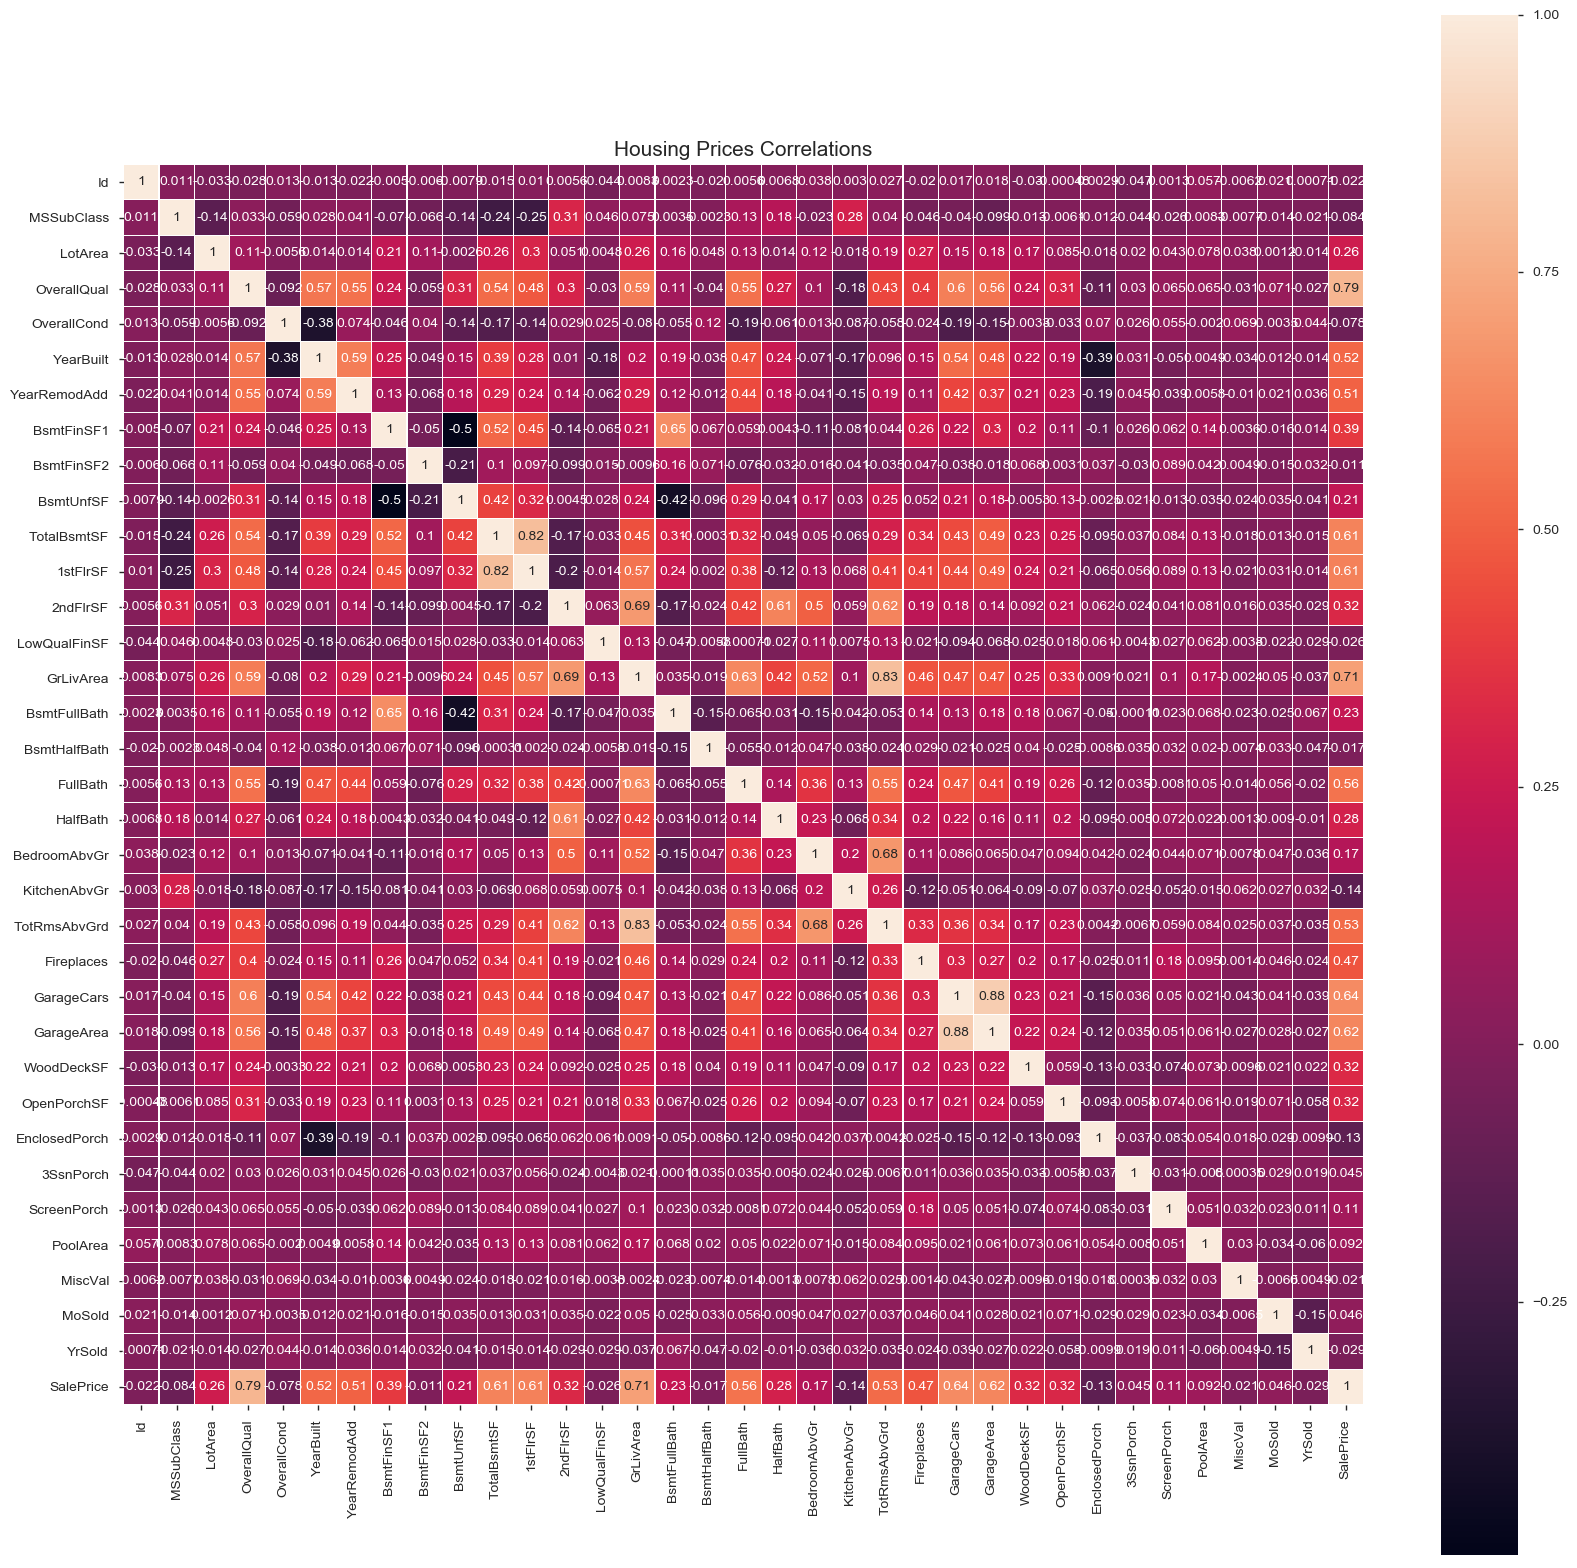

In [30]:
corrmat = train_dft.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(20, 20))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True, annot_kws={"size":10})
plt.title('Housing Prices Correlations', size=15)
plt.show()

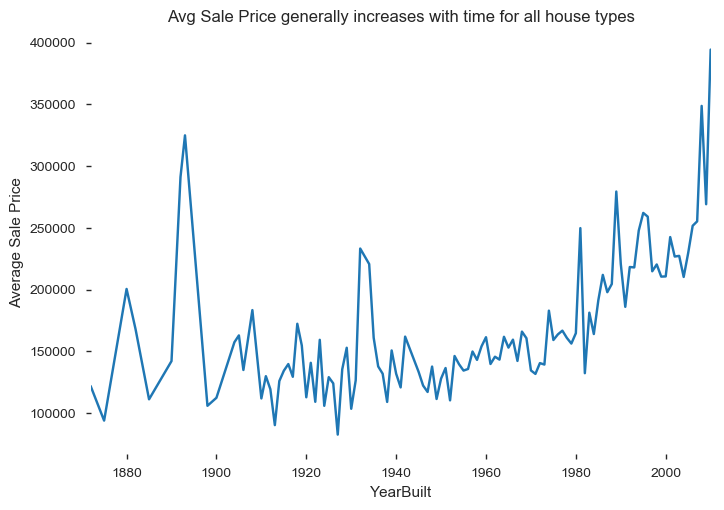

In [31]:
# make a data frame for one Sale Price indicator and all countries possible
salepr_mlt = pd.melt(train_dft, id_vars=[
                  'HouseStyle', 'SalePrice', 'YearBuilt'], var_name='Variable')

# set indicator and pivot
# salepr_mlt = salepr_mlt[salepr_mlt['Indicator'] ==
#                   'Mortality rate, under-5 (per 1,000)']

salepr_mlt_grp = salepr_mlt.groupby('YearBuilt', as_index=False)['SalePrice'].mean()
salepr_mlt_grp['YearBuilt'] = salepr_mlt_grp['YearBuilt'].astype(int)

errors = salepr_mlt_grp.groupby('YearBuilt')['SalePrice'].std().values
ax = salepr_mlt_grp.plot(x='YearBuilt', y='SalePrice', yerr=errors, legend=False)
ax.set_ylabel('Average Sale Price')
ax.set_title('Avg Sale Price generally increases with time for all house types')

plt.show()

In [32]:
salepr_mlt.head()

HouseStyle  SalePrice  YearBuilt Variable value
0     2Story     208500       2003       Id     1
1     1Story     181500       1976       Id     2
2     2Story     223500       2001       Id     3
3     2Story     140000       1915       Id     4
4     2Story     250000       2000       Id     5

In [68]:
dft_numerical = train_dft[['Id', 'MSSubClass', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold',
       'SalePrice']]

In [69]:
dft_numerical.head()

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0   1          60     8450            7            5       2003          2003   
1   2          20     9600            6            8       1976          1976   
2   3          60    11250            7            5       2001          2002   
3   4          70     9550            7            5       1915          1970   
4   5          60    14260            8            5       2000          2000   

  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0        196         706           0        150          856       856   
1          0         978           0        284         1262      1262   
2        162         486           0        434          920       920   
3          0         216           0        540          756       961   
4        350         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces GarageYrBlt  \
0         1             3             1             8           0        2003   
1         0             3             1             6           1        1976   
2         1             3             1             6           1        2001   
3         0             3             1             7           1        1998   
4         1             4             1             9           1        2000   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           2         548           0           61              0          0   
1           2         460         298            0              0          0   
2           2         608           0           42              0          0   
3           3         642           0           35            272          0   
4           3         836         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0            0         0        0       2    2008     208500  
1            0         0        0       5    2007     181500  
2            0         0        0       9    2008     223500  
3            0         0        0       2    2006     140000  
4            0         0        0      12    2008     250000

In [70]:
dft_numerical = dft_numerical.replace("NA", np.nan, regex=True)

In [75]:
dftn_numerical = dft_numerical.dropna(axis=0)
dftn_numerical

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0        1          60     8450            7            5       2003   
1        2          20     9600            6            8       1976   
2        3          60    11250            7            5       2001   
3        4          70     9550            7            5       1915   
4        5          60    14260            8            5       2000   
5        6          50    14115            5            5       1993   
6        7          20    10084            8            5       2004   
7        8          60    10382            7            6       1973   
8        9          50     6120            7            5       1931   
9       10         190     7420            5            6       1939   
10      11          20    11200            5            5       1965   
11      12          60    11924            9            5       2005   
12      13          20    12968            5            6       1962   
13      14          20    10652            7            5       2006   
14      15          20    10920            6            5       1960   
15      16          45     6120            7            8       1929   
16      17          20    11241            6            7       1970   
17      18          90    10791            4            5       1967   
18      19          20    13695            5            5       2004   
19      20          20     7560            5            6       1958   
20      21          60    14215            8            5       2005   
21      22          45     7449            7            7       1930   
22      23          20     9742            8            5       2002   
23      24         120     4224            5            7       1976   
24      25          20     8246            5            8       1968   
25      26          20    14230            8            5       2007   
26      27          20     7200            5            7       1951   
27      28          20    11478            8            5       2007   
28      29          20    16321            5            6       1957   
29      30          30     6324            4            6       1927   
...    ...         ...      ...          ...          ...        ...   
1427  1428          50    10930            5            6       1945   
1428  1429          30     7200            5            7       1940   
1429  1430          20    12546            6            7       1981   
1430  1431          60    21930            5            5       2005   
1431  1432         120     4928            6            6       1976   
1432  1433          30    10800            4            6       1927   
1433  1434          60    10261            6            5       2000   
1434  1435          20    17400            5            5       1977   
1435  1436          20     8400            6            9       1962   
1436  1437          20     9000            4            6       1971   
1437  1438          20    12444            8            5       2008   
1438  1439          20     7407            6            7       1957   
1439  1440          60    11584            7            6       1979   
1440  1441          70    11526            6            7       1922   
1441  1442         120     4426            6            5       2004   
1442  1443          60    11003           10            5       2008   
1443  1444          30     8854            6            6       1916   
1444  1445          20     8500            7            5       2004   
1445  1446          85     8400            6            5       1966   
1446  1447          20    26142            5            7       1962   
1447  1448          60    10000            8            5       1995   
1448  1449          50    11767            4            7       1910   
1451  1452          20     9262            8            5       2008   
1452  1453         180     3675            5    

In [38]:
profile = pandas_profiling.ProfileReport(dft_numerical)
profile 

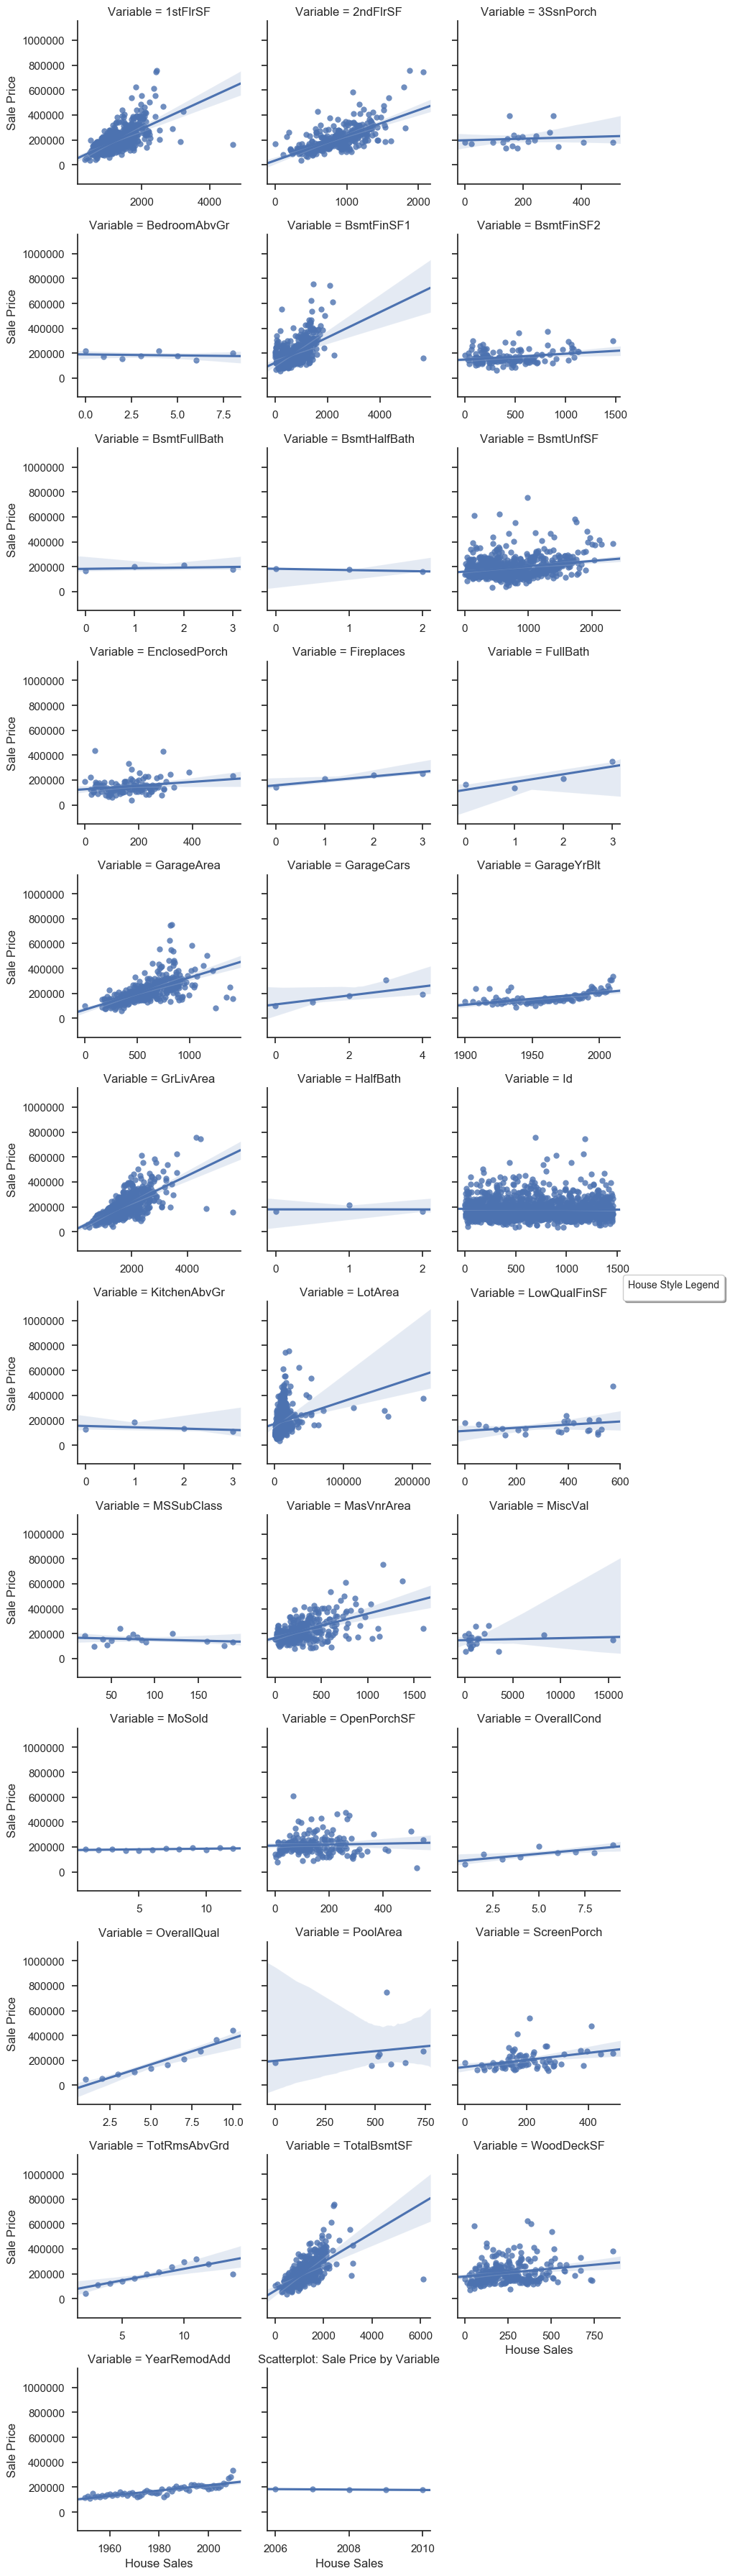

In [55]:
salepr_mlt_numerical = pd.melt(dft_numerical, id_vars=['SalePrice', 'YearBuilt'], var_name='Variable')

salepr_mlt_vars = salepr_mlt_numerical.groupby(['Variable', 'value'])[
    'SalePrice'].mean().reset_index()

# Showing the  information in a seaborn facet grid.
sns.set(style="ticks")  # Setting the overall aesthetic
g = sns.FacetGrid(salepr_mlt_vars, col="Variable",
                  palette='RdBu', col_wrap=3, legend_out=True, sharex=False)
g = g.map(sns.regplot, "value", 'SalePrice').add_legend(
     title='House Style Legend', frameon=True, shadow=True, fontsize='medium')
g.set_ylabels("Sale Price")
g.set_xlabels("House Sales")

plt.title('Scatterplot: Sale Price by Variable')
plt.show()

In [79]:
dftn_numerical.shape

(1371, 37)

In [82]:
dftn_numerical.head()

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0   1          60     8450            7            5       2003          2003   
1   2          20     9600            6            8       1976          1976   
2   3          60    11250            7            5       2001          2002   
3   4          70     9550            7            5       1915          1970   
4   5          60    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       196.0         706           0        150          856       856   
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   
3         0.0         216           0        540          756       961   
4       350.0         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1             3             1             8           0   
1         0             3             1             6           1   
2         1             3             1             6           1   
3         0             3             1             7           1   
4         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

feature importance.
age since remodled or made.

In [80]:
X = dftn_numerical.iloc[:,0:36]  #independent columns
y = dftn_numerical.iloc[:,-1]    #target column i.e sale price
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

           Specs         Score
2        LotArea  9.838279e+06
33       MiscVal  6.165951e+06
13      2ndFlrSF  4.342111e+05
8     BsmtFinSF1  3.754314e+05
32      PoolArea  3.605311e+05
9     BsmtFinSF2  3.517069e+05
10     BsmtUnfSF  2.693550e+05
7     MasVnrArea  2.674965e+05
14  LowQualFinSF  2.437374e+05
15     GrLivArea  1.788907e+05


C:\Users\TianiCalip\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.04887522 0.02390456 0.04999141 0.03119464 0.02767644 0.04216388
 0.04084174 0.03294364 0.03987864 0.01327217 0.04295756 0.04573254
 0.04935103 0.02619744 0.00261733 0.04856677 0.0208238  0.00599352
 0.01204526 0.01379459 0.0227748  0.00270731 0.0366992  0.02180226
 0.04670984 0.01523372 0.04562986 0.03661406 0.03325179 0.01303767
 0.00304088 0.0115201  0.00022135 0.00488934 0.04578097 0.04126468]


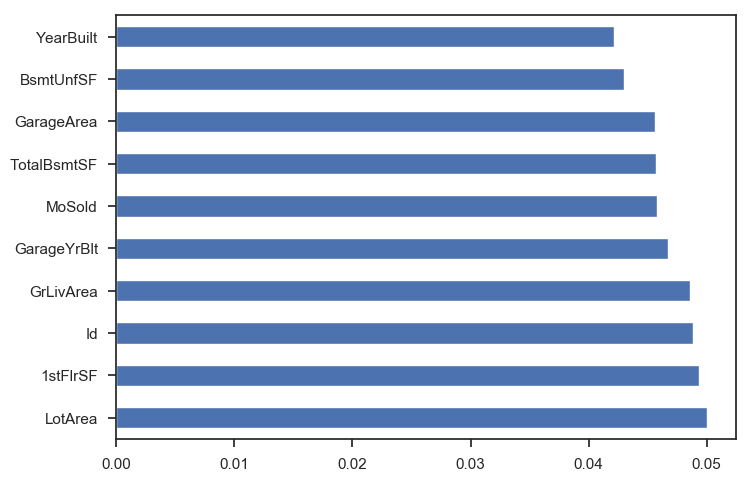

In [81]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()